# Pre-processing 

pipeline = transformer + estimateur 

In [64]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, LabelEncoder, OneHotEncoder, MultiLabelBinarizer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, SGDClassifier
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [3]:
X = np.array(['Chat','Chien','Chat','Oiseau'])

In [4]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [5]:
transformer.transform(X)

array([0, 1, 0, 2])

In [6]:
transformer.fit_transform(X)

array([0, 1, 0, 2])

## Encodage

Besoin de traiter des valeurs numériques (male --> 1 / female --> 2) <br>
<br>
Encodage ordinal = associer chaque catégorie ou classe d'une variable à une valeur décimale unique. <br>
Encodage one hot = chaque variable est codée de manière binaire. 

In [12]:
## Encodage ordinal 

y = np.array(['Chat','Chien','Chat','Oiseau'])

encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y)

print(encoder.inverse_transform(y))



X = np.array([
    ['Chat', 'Poils'], 
    ['Chien', 'Poils'], 
    ['Chat', 'Poils'], 
    ['Oiseau', 'Plumes'],
])

encoder = OrdinalEncoder()
X_encode = encoder.fit_transform(X)

print(X_encode)

[0 1 0 2]
['Chat' 'Chien' 'Chat' 'Oiseau']


In [22]:
## Encodage one hot 
#LabelBinarizer()
#MultiLabelBinarizer()
#OneHotEncoder()

encoder = LabelBinarizer()
print(encoder.fit_transform(y))

encoder = MultiLabelBinarizer()
print(encoder.fit_transform(X))

encoder = OneHotEncoder()
print(encoder.fit_transform(X))

[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]
[[1 0 0 0 1]
 [0 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]
  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 2)	1.0
  (3, 3)	1.0


## Normalisation 

Il est nécessaire de normaliser les données quantitatives (les mettre toutes sur la même échelle !) <br>
- normalisation min/max : transformer chaque variable de telle sorte que toutes ses valeurs soient comprises entre 0 et 1  
$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$<br>
<br>
- standardisation : $X_{scaled} = \frac{X - \mu}{\sigma}$<br>
<br>
> Inconvénient de ces deux méthodes : Elles sont très sensibles aux valeurs extrêmes ! 
<br>
- transformer robust scaler : $X_{scaled} = \frac{X - mediane}{IQR}$

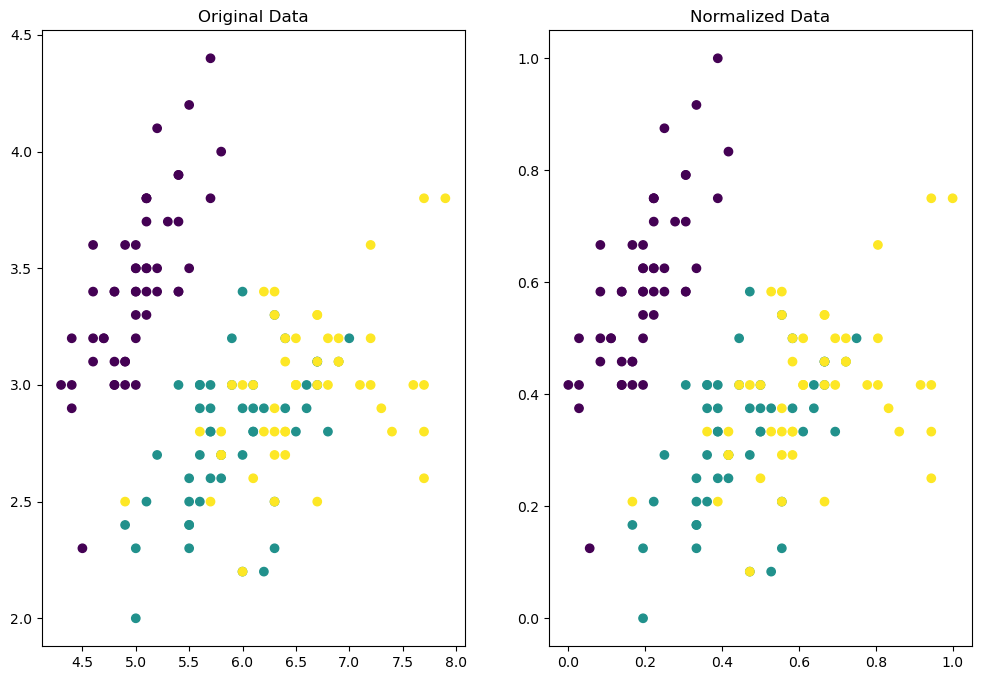

In [33]:
## normalisation min/max 

X = np.array([[70],[80],[90],[120]])
scaler = MinMaxScaler()
scaler.fit_transform(X)

iris = load_iris()
X,y = iris.data, iris.target 


scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_minmax[:,0],X_minmax[:,1],c=y)
plt.title('Normalized Data')
plt.show()

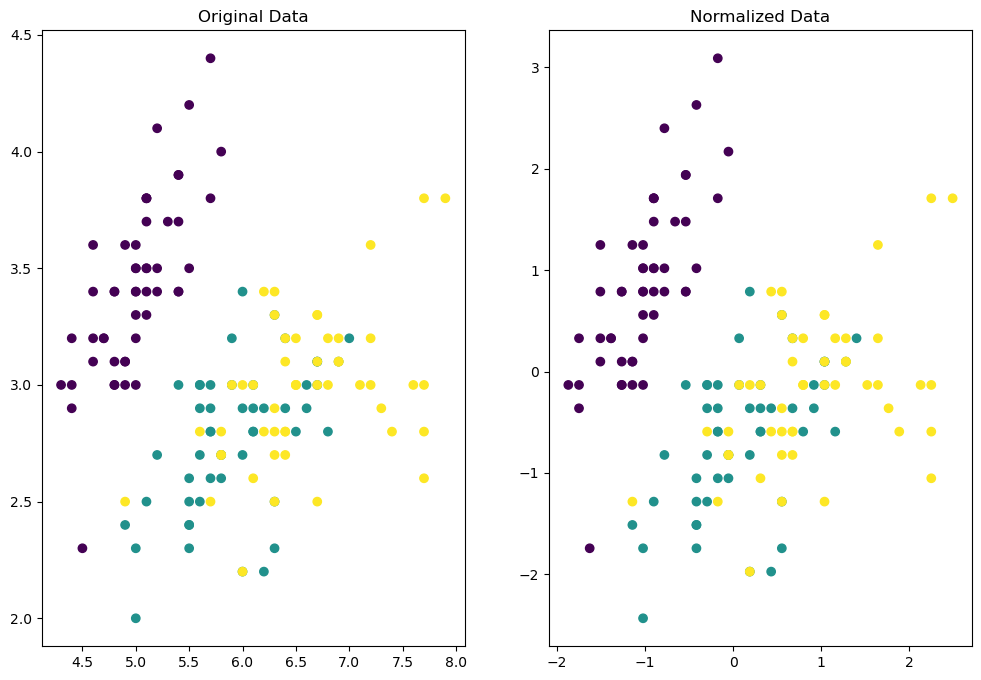

In [37]:
## Standardisation 

X = np.array([[70],[80],[90],[120]])
scaler = StandardScaler()
scaler.fit_transform(X)

iris = load_iris()
X,y = iris.data, iris.target 


scaler = StandardScaler()
X_minmax = scaler.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_minmax[:,0],X_minmax[:,1],c=y)
plt.title('Normalized Data')
plt.show()

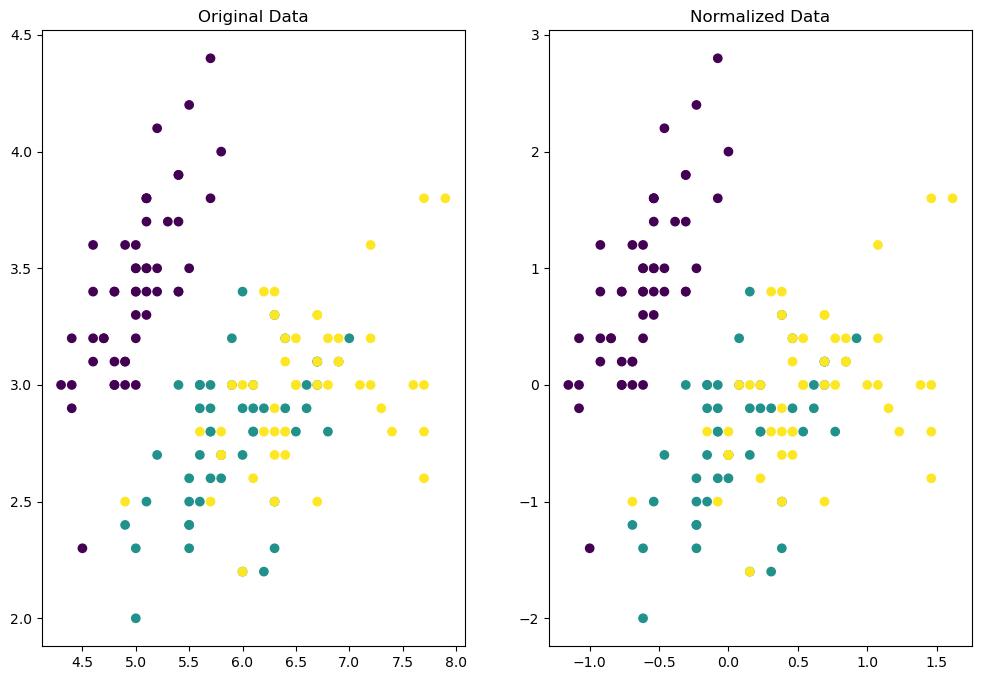

In [40]:
## Robust Scaler 

X = np.array([[70],[80],[90],[120]])
scaler = RobustScaler()
scaler.fit_transform(X)

iris = load_iris()
X,y = iris.data, iris.target 


scaler = RobustScaler()
X_minmax = scaler.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_minmax[:,0],X_minmax[:,1],c=y)
plt.title('Normalized Data')
plt.show()

## Polynomial Features

Créer des valeurs polynomiales à partir des valeurs existantes --> dvt de modèles plus riches. 

In [44]:
X = np.array([[1],[2],[0.5]])

PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

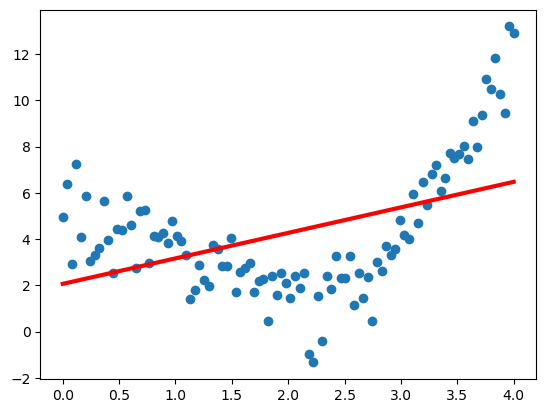

In [54]:
x = np.linspace(0,4,100).reshape((100,1))
y = x**2 + 5*np.cos(x) + np.random.randn(100,1)

plt.scatter(x,y)

model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

plt.plot(x,y_pred, c='r', lw=3)

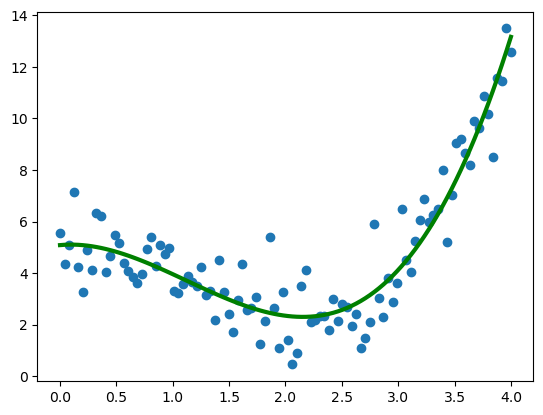

In [57]:
x = np.linspace(0,4,100).reshape((100,1))
y = x**2 + 5*np.cos(x) + np.random.randn(100,1)



plt.scatter(x,y)

x_poly = PolynomialFeatures(3).fit_transform(x)
model = LinearRegression().fit(x_poly,y)
y_pred = model.predict(x_poly)

plt.plot(x,y_pred, c='green', lw=3)

## Discrétisation 

preprocessing.Binarizer : diviser une variable en deux catégories <br> 
preprocessing.KBinsDiscretizer : il faut indique n_bins (nb de découpages)

## Pipeline 

Utiliser X_train, y_train pour développer un transformer et un estimator puis l'appliquer au x_test 

In [61]:
iris = load_iris()
X,y = iris.data, iris.target 

X_train, X_test, y_train, y_test = train_test_split(X,y)

# transformer 
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# estimator 
model1 = SGDClassifier(random_state = 0)
model2 = SGDClassifier(random_state = 0)
model1.fit(X_train_transformed,y_train)
model2.fit(X_train,y_train)

#test 
X_test_transformed = scaler.transform(X_test)
y_pred1 = model1.predict(X_test_transformed)
y_pred2 = model2.predict(X_test)

print(model1.score(X_test_transformed,y_test))
print(model2.score(X_test,y_test))


0.9210526315789473
0.631578947368421


Optimiser son code : regrouper son transformer et son estimator dans une pipeline (chaîne de transormation) --> estimateur composite

In [63]:
model = make_pipeline(StandardScaler(),SGDClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8421052631578947

In [92]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

params = { 'polynomialfeatures__degree' : [2,3,4],
          }

grid = GridSearchCV(model,param_grid=params,cv=4)

grid.fit(X_train , y_train)

grid.best_params_


model = make_pipeline(PolynomialFeatures(3),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

model.fit(X_train,y_train)

y_pred = model.predict(X_test) 

def accuracy(y_pred,y_test):
    return print(np.sum(y_pred==y_test)/len(y_test))

accuracy(y_pred,y_test)

1.0


In [93]:
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.631578947368421